<a href="https://colab.research.google.com/github/BhumikaAggwl/isro_proj/blob/main/code_for_path.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Predicted positions saved to STARLINK-11465_[DTC]_positions.csv


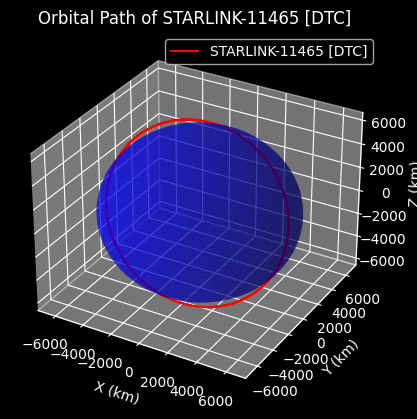

In [4]:
import numpy as np
import pandas as pd
from sgp4.api import Satrec
from sgp4.api import jday
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import style

# Parse TLE Data from File
def parse_tle_from_file(file_path):
    satellites = {}
    with open(file_path, 'r') as file:
        lines = file.readlines()
        for i in range(len(lines)):
            line = lines[i].strip()
            if line.startswith('1'):
                sat_name = lines[i - 1].strip()
                tle_line1 = line
                tle_line2 = lines[i + 1].strip()
                satellites[sat_name] = (tle_line1, tle_line2)
    return satellites

# Constants
start_time = datetime.utcnow()
end_time = start_time + timedelta(hours=3)  # Predict for 3 hours
time_step = timedelta(minutes=1)  # 1-minute intervals

# Load TLE Data
tle_file = "last30.txt"
satellites = parse_tle_from_file(tle_file)

# Select a Satellite
sat_name = "STARLINK-11465 [DTC]"  # Replace with desired satellite name from the file
tle_line1, tle_line2 = satellites[sat_name]
satellite = Satrec.twoline2rv(tle_line1, tle_line2)

# Predict Satellite Positions
results = []
current_time = start_time
while current_time <= end_time:
    jd, fr = jday(
        current_time.year, current_time.month, current_time.day,
        current_time.hour, current_time.minute, current_time.second
    )
    e, r, v = satellite.sgp4(jd, fr)  # Get position (r) and velocity (v)
    if e == 0:  # Successful computation
        results.append({
            "Time": current_time,
            "X": r[0],  # km
            "Y": r[1],  # km
            "Z": r[2],  # km
        })
    current_time += time_step

# Save Predictions to CSV
df = pd.DataFrame(results)
output_csv = f"{sat_name.replace(' ', '_')}_positions.csv"
df.to_csv(output_csv, index=False)
print(f"Predicted positions saved to {output_csv}")

# Visualize Orbital Trajectory
style.use("dark_background")
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot Earth
earth_radius = 6371  # km
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = earth_radius * np.outer(np.cos(u), np.sin(v))
y = earth_radius * np.outer(np.sin(u), np.sin(v))
z = earth_radius * np.outer(np.ones(np.size(u)), np.cos(v))
ax.plot_surface(x, y, z, color='blue', alpha=0.5)

# Plot Satellite Orbit
orbit_x = df["X"].to_numpy()
orbit_y = df["Y"].to_numpy()
orbit_z = df["Z"].to_numpy()
ax.plot(orbit_x, orbit_y, orbit_z, color='red', label=sat_name)

# Plot Settings
ax.set_title(f"Orbital Path of {sat_name}")
ax.set_xlabel("X (km)")
ax.set_ylabel("Y (km)")
ax.set_zlabel("Z (km)")
ax.legend()
plt.show()


In [3]:
!pip install sgp4


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.3/232.3 kB 8.3 MB/s eta 0:00:00


In [ ]:
import matplotlib.pyplot as plt
print(plt.style.available)


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [ ]:
!pip install seaborn

In [ ]:
!pip install sgp4


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.3/232.3 kB 6.0 MB/s eta 0:00:00
